# Assignment 2 - Simple Implementation

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Q1: Linear Regression on Auto MPG

In [2]:
# (a) Load data and remove missing values
df = pd.read_csv('auto-mpg.csv')
df = df.dropna()
print("Data loaded, shape:", df.shape)

Data loaded, shape: (398, 9)


In [3]:
# (b) Identify predictor and target
X = df.select_dtypes(include=[np.number]).drop('mpg', axis=1)
y = df['mpg']
print("Features:", X.columns.tolist())
print("Target: mpg")

Features: ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
Target: mpg


In [4]:
# (c) Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train:", len(X_train), "Test:", len(X_test))

Train: 318 Test: 80


In [5]:
# (d) Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Model trained!")

Model trained!


In [6]:
# (e) Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 Score:", r2)

MSE: 8.20994936699036
R2 Score: 0.8473034704477669


In [7]:
# (f) Discussion
print("If R2 = 0.85:")
print("- Model explains 85% of variance")
print("- Good performance")
print("- Predictions are reliable")

If R2 = 0.85:
- Model explains 85% of variance
- Good performance
- Predictions are reliable


## Q2: Bootstrap Sampling

In [8]:
# (a) Load btissue.csv
df_bt = pd.read_csv('btissue.csv')
# Assume last column is label
X_bt = df_bt.iloc[:, :-1]
print("Features shape:", X_bt.shape)

Features shape: (106, 9)


In [9]:
# (b) Create bootstrap sample
sample = resample(X_bt, n_samples=100, replace=True, random_state=42)
print("Bootstrap sample created, size:", len(sample))

Bootstrap sample created, size: 100


In [10]:
# (c) Show first 10 rows
print(sample.head(10))
print("\nSome rows may be repeated due to sampling with replacement")

              I0     PA500       HFS           DA           Area        A/DA  \
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
51    274.993396  0.147131  0.137532    66.457943    1217.415651   18.318588   
92   1800.000000  0.091979  0.205251   362.863321   15021.553890   41.397278   
14    485.668806  0.230209  0.134041   253.893699    8135.968359   32.044783   
71   1385.664721  0.092328  0.089361   202.480044    8785.028733   43.387134   
60    197.000000  0.132645  0.074002    33.460653     409.647141   12.242652   
20    500.000000  0.192684  0.194779   144.688578    3055.012963   21.114403   
102  2600.000000  0.200538  0.208043  1063.441427  174480.476200  164.071543   
82   1647.939811  0.080983  0.086568   576.770376   11852.485060   20.549747   
86   2100.000000  0.121649  0.377689   450.551667   35671.606290   79.173176   

         Max IP          DR            P  
102  418.687286  977.552367  2664.583623  
51    40.849678   52.421008   327

## Q3: 5-Fold Cross-Validation

In [11]:
# (a) Use btissue.csv
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print("5-Fold CV initialized")

5-Fold CV initialized


In [12]:
# (b) Print train/test indices for each fold
for i, (train_idx, test_idx) in enumerate(kfold.split(X_bt), 1):
    print(f"Fold {i}: Train={len(train_idx)}, Test={len(test_idx)}")

Fold 1: Train=84, Test=22
Fold 2: Train=85, Test=21
Fold 3: Train=85, Test=21
Fold 4: Train=85, Test=21
Fold 5: Train=85, Test=21


In [13]:
# (c) Visualize coverage
print("Each fold uses different 20% for testing")
print("All folds together cover 100% of data without overlap")

Each fold uses different 20% for testing
All folds together cover 100% of data without overlap


## Q4: Holdout vs Cross-Validation

In [14]:
# (a) Setup
y_bt = df_bt.iloc[:, -1]
clf = DecisionTreeClassifier(random_state=42)

In [15]:
# (b) i) Holdout 80/20
X_tr, X_te, y_tr, y_te = train_test_split(X_bt, y_bt, test_size=0.2, random_state=42)
clf.fit(X_tr, y_tr)
holdout_acc = clf.score(X_te, y_te)
print("Holdout Accuracy:", holdout_acc)

Holdout Accuracy: 0.7272727272727273


In [16]:
# (b) ii) 5-Fold CV
cv_scores = cross_val_score(clf, X_bt, y_bt, cv=5)
cv_acc = cv_scores.mean()
print("CV Accuracy:", cv_acc)
print("CV Scores:", cv_scores)

CV Accuracy: 0.6225108225108225
CV Scores: [0.63636364 0.66666667 0.66666667 0.61904762 0.52380952]


In [17]:
# (c) Compare
print("\nComparison:")
print("Holdout:", holdout_acc)
print("5-Fold CV:", cv_acc)
print("CV is more reliable - uses all data")


Comparison:
Holdout: 0.7272727272727273
5-Fold CV: 0.6225108225108225
CV is more reliable - uses all data


## Q5: Feature Creation

In [18]:
# (a) Create dataset and new features
df_q5 = pd.DataFrame({
    'Age': [25, 35, 45, 28, 50, 30, 40, 22, 55, 33],
    'Income': [30000, 50000, 70000, 35000, 80000, 40000, 60000, 28000, 90000, 45000],
    'Spending_Score': [70, 80, 60, 75, 50, 85, 65, 90, 45, 78]
})

# Age Group
df_q5['Age_Group'] = pd.cut(df_q5['Age'], bins=[0, 30, 40, 50, 100], labels=['Young', 'Adult', 'Middle', 'Senior'])

# Income to Spending Ratio
df_q5['Income_Spending_Ratio'] = df_q5['Income'] / df_q5['Spending_Score']

# Normalized Spending
df_q5['Normalized_Spending'] = df_q5['Spending_Score'] / 100

print(df_q5)

   Age  Income  Spending_Score Age_Group  Income_Spending_Ratio  \
0   25   30000              70     Young             428.571429   
1   35   50000              80     Adult             625.000000   
2   45   70000              60    Middle            1166.666667   
3   28   35000              75     Young             466.666667   
4   50   80000              50    Middle            1600.000000   
5   30   40000              85     Young             470.588235   
6   40   60000              65     Adult             923.076923   
7   22   28000              90     Young             311.111111   
8   55   90000              45    Senior            2000.000000   
9   33   45000              78     Adult             576.923077   

   Normalized_Spending  
0                 0.70  
1                 0.80  
2                 0.60  
3                 0.75  
4                 0.50  
5                 0.85  
6                 0.65  
7                 0.90  
8                 0.45  
9           

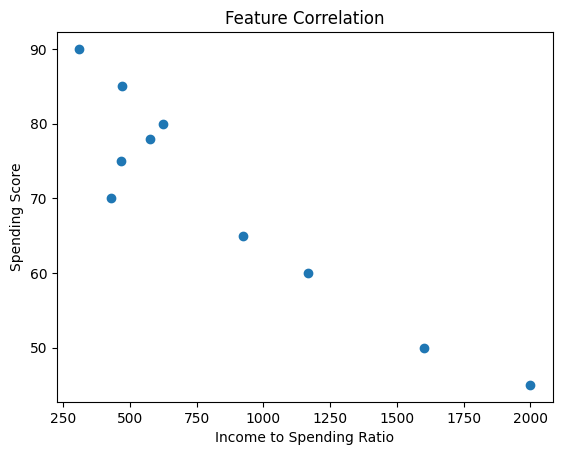

In [19]:
# (b) Plot correlation
plt.scatter(df_q5['Income_Spending_Ratio'], df_q5['Spending_Score'])
plt.xlabel('Income to Spending Ratio')
plt.ylabel('Spending Score')
plt.title('Feature Correlation')
plt.show()

## Q6: Iris Feature Selection

In [20]:
# (a) Load Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
print("Iris loaded:", X_iris.shape)

Iris loaded: (150, 4)


In [21]:
# (b) Create DataFrame
df_iris = pd.DataFrame(X_iris, columns=iris.feature_names)
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [22]:
# (c) Train with all features
X_tr, X_te, y_tr, y_te = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42)
clf_all = DecisionTreeClassifier(random_state=42)
clf_all.fit(X_tr, y_tr)
acc_all = clf_all.score(X_te, y_te)
print("Accuracy with all features:", acc_all)

Accuracy with all features: 1.0


In [23]:
# (d) Select first 2 features
X_sel = df_iris.iloc[:, 0:2]
print("Selected features:", X_sel.columns.tolist())

Selected features: ['sepal length (cm)', 'sepal width (cm)']


In [24]:
# (e) Train with selected features
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X_sel, y_iris, test_size=0.3, random_state=42)
clf_sel = DecisionTreeClassifier(random_state=42)
clf_sel.fit(X_tr2, y_tr2)
acc_sel = clf_sel.score(X_te2, y_te2)
print("Accuracy with 2 features:", acc_sel)

Accuracy with 2 features: 0.6666666666666666


In [25]:
# (f) Compare
print("\nComparison:")
print("All features (4):", acc_all)
print("Selected features (2):", acc_sel)
print("Difference:", acc_all - acc_sel)


Comparison:
All features (4): 1.0
Selected features (2): 0.6666666666666666
Difference: 0.33333333333333337


## Q7: PCA on Iris

In [26]:
# (a) Load Iris (already loaded above)
print("Using Iris data")

Using Iris data


In [27]:
# (b) Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
print("PCA done, new shape:", X_pca.shape)
print("Explained variance:", pca.explained_variance_ratio_)

PCA done, new shape: (150, 2)
Explained variance: [0.92461872 0.05306648]


In [28]:
# (c) Create DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = y_iris
print(df_pca.head())

        PC1       PC2  species
0 -2.684126  0.319397        0
1 -2.714142 -0.177001        0
2 -2.888991 -0.144949        0
3 -2.745343 -0.318299        0
4 -2.728717  0.326755        0


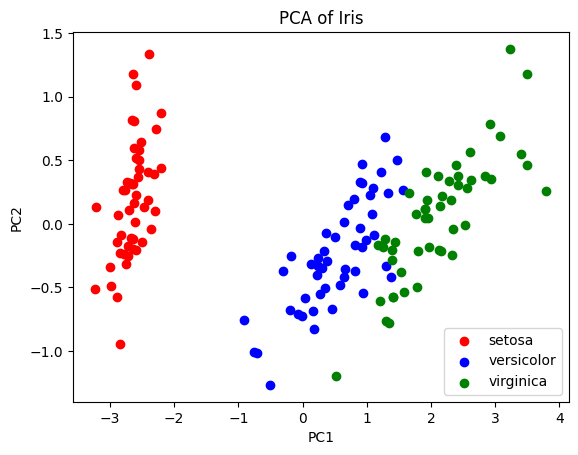

In [29]:
# (d) Plot
colors = ['red', 'blue', 'green']
for i in range(3):
    mask = df_pca['species'] == i
    plt.scatter(df_pca[mask]['PC1'], df_pca[mask]['PC2'], c=colors[i], label=iris.target_names[i])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Iris')
plt.show()

## Q8: Categorical Encoding

In [30]:
# (a) Create DataFrame
df_emp = pd.DataFrame({
    'Department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance'],
    'Job_Role': ['Manager', 'Analyst', 'Clerk', 'Manager', 'Clerk', 'Analyst'],
    'Marital_Status': ['Single', 'Married', 'Divorced', 'Married', 'Single', 'Married']
})
print(df_emp)

  Department Job_Role Marital_Status
0         HR  Manager         Single
1         IT  Analyst        Married
2    Finance    Clerk       Divorced
3         IT  Manager        Married
4         HR    Clerk         Single
5    Finance  Analyst        Married


In [31]:
# (b) Display original
print("Original data:")
print(df_emp)

Original data:
  Department Job_Role Marital_Status
0         HR  Manager         Single
1         IT  Analyst        Married
2    Finance    Clerk       Divorced
3         IT  Manager        Married
4         HR    Clerk         Single
5    Finance  Analyst        Married


In [32]:
# (c) Encode
from sklearn.preprocessing import LabelEncoder

# Label Encoding for Job_Role
le = LabelEncoder()
df_emp['Job_Role_Encoded'] = le.fit_transform(df_emp['Job_Role'])

# One-Hot Encoding for Department
df_encoded = pd.get_dummies(df_emp, columns=['Department', 'Marital_Status'])

print("\nEncoded data:")
print(df_encoded)


Encoded data:
  Job_Role  Job_Role_Encoded  Department_Finance  Department_HR  \
0  Manager                 2               False           True   
1  Analyst                 0               False          False   
2    Clerk                 1                True          False   
3  Manager                 2               False          False   
4    Clerk                 1               False           True   
5  Analyst                 0                True          False   

   Department_IT  Marital_Status_Divorced  Marital_Status_Married  \
0          False                    False                   False   
1           True                    False                    True   
2          False                     True                   False   
3           True                    False                    True   
4          False                    False                   False   
5          False                    False                    True   

   Marital_Status_Single  
0   